In [ ]:
import polars as pl
import matplotlib.pyplot as plt

In [13]:
data = pl.read_csv("../Team_Project_doc_data_24/train+test.csv")
submit = pl.read_csv("../Team_Project_doc_data_24/submit.csv")

In [3]:
data.head()

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
i64,str,str,str,str,str,str,str,str,str,i64,i64,i64,str,f64,f64,f64,f64,f64,str
47,"""admin.""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",2,999,0,"""nonexistent""",-0.1,93.2,-42.0,4.021,5195.8,"""no"""
52,"""services""","""divorced""","""high.school""","""no""","""no""","""no""","""telephone""","""may""","""mon""",3,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
30,"""admin.""","""single""","""basic.9y""","""no""","""no""","""no""","""telephone""","""nov""","""thu""",1,999,0,"""nonexistent""",-0.1,93.2,-42.0,4.076,5195.8,"""no"""
28,"""services""","""single""","""unknown""","""no""","""no""","""no""","""cellular""","""may""","""tue""",2,999,1,"""failure""",-1.8,92.893,-46.2,1.344,5099.1,"""no"""
29,"""technician""","""married""","""professional.course""","""no""","""yes""","""yes""","""cellular""","""jul""","""tue""",1,999,0,"""nonexistent""",1.4,93.918,-42.7,4.961,5228.1,"""no"""


# 数値変数

In [30]:
def plot_hist(data, submit, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].hist(data[col].to_numpy(), bins=50)
    ax[0].set_title(f"{col} train+test")
    ax[1].hist(submit[col].to_numpy(), bins=50)
    ax[1].set_title(f"{col} submit")
    plt.show()

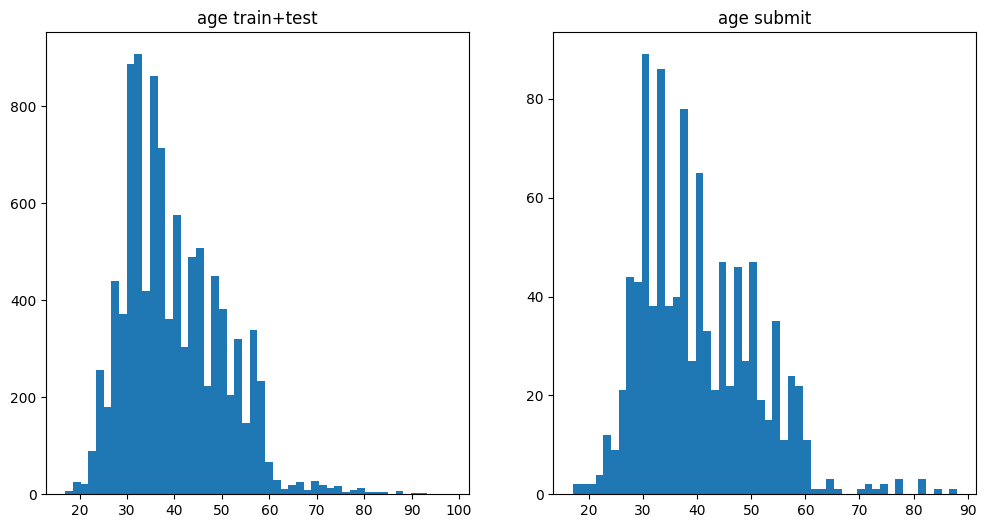

In [31]:
plot_hist(data, submit, "age")

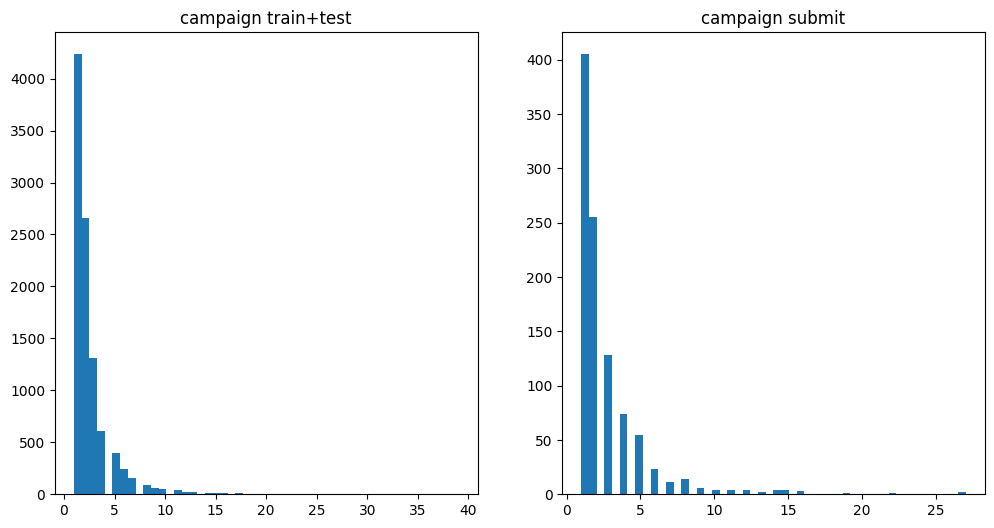

In [33]:
plot_hist(data, submit, "campaign")

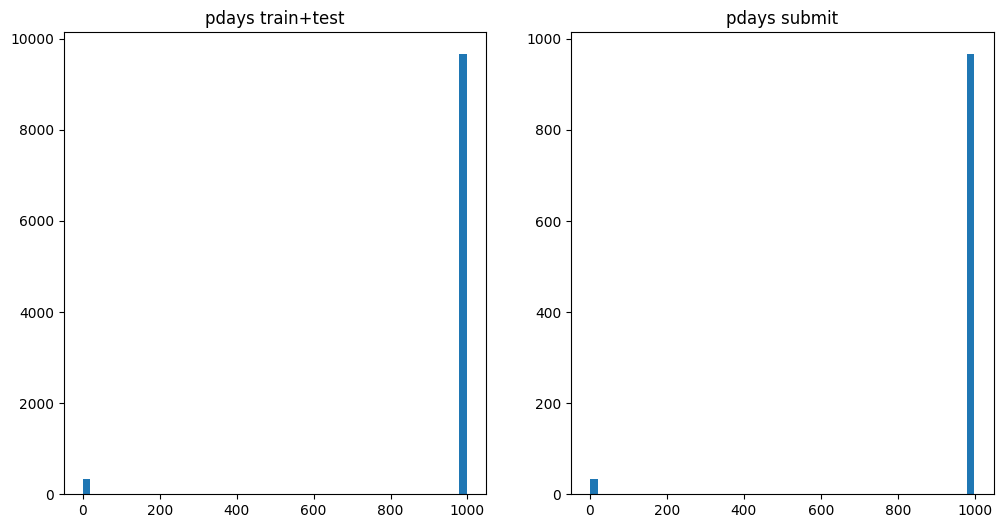

In [ ]:
# pdaysはカテゴリ変数として扱ってもよさそう
# 例えば、999かそれ以外かで分ける
plot_hist(data, submit, "pdays")

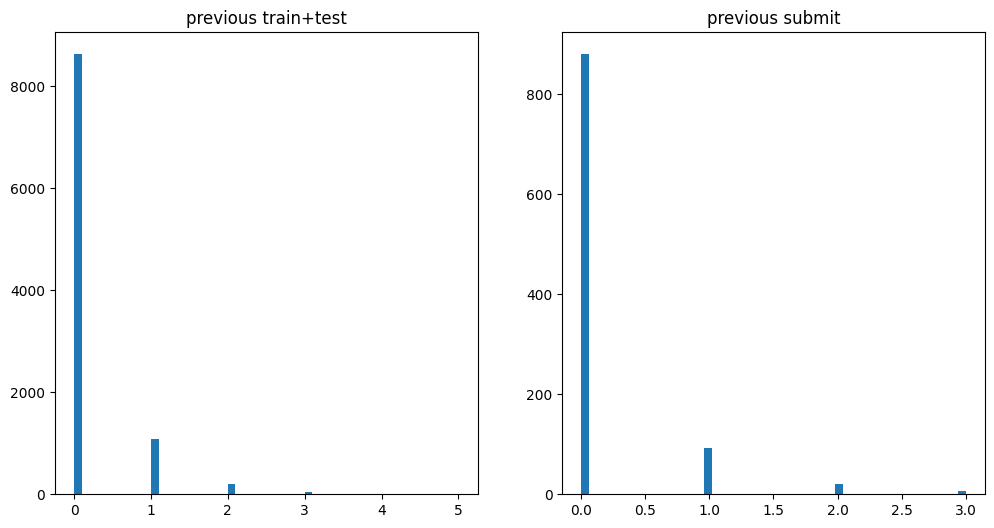

In [ ]:
# これもカテゴリ変数として扱ってもよさそう
plot_hist(data, submit, "previous")

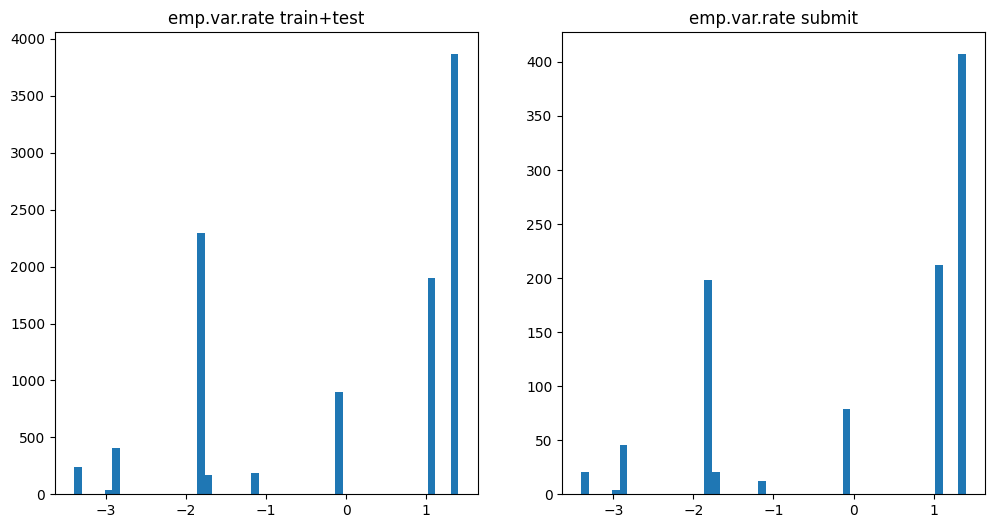

In [37]:
plot_hist(data, submit, "emp.var.rate")

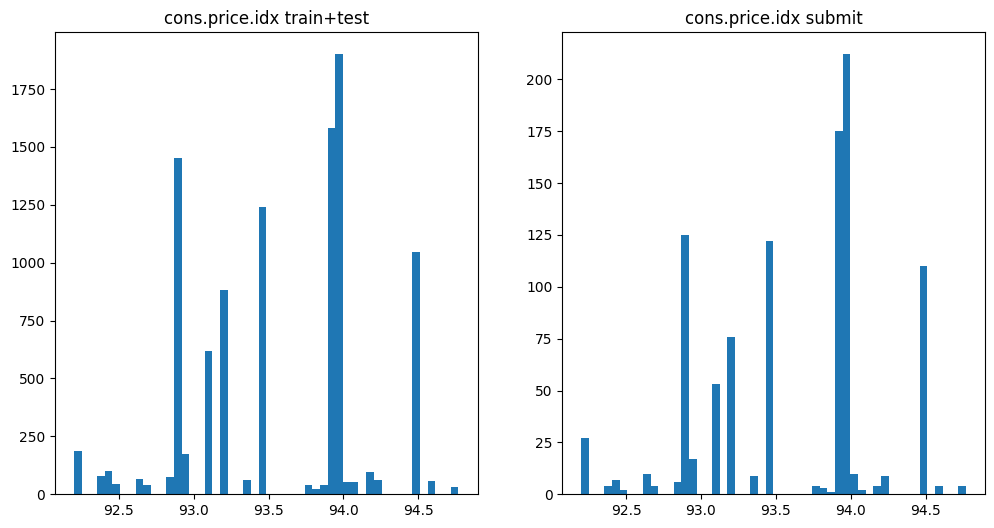

In [38]:
plot_hist(data, submit, "cons.price.idx")

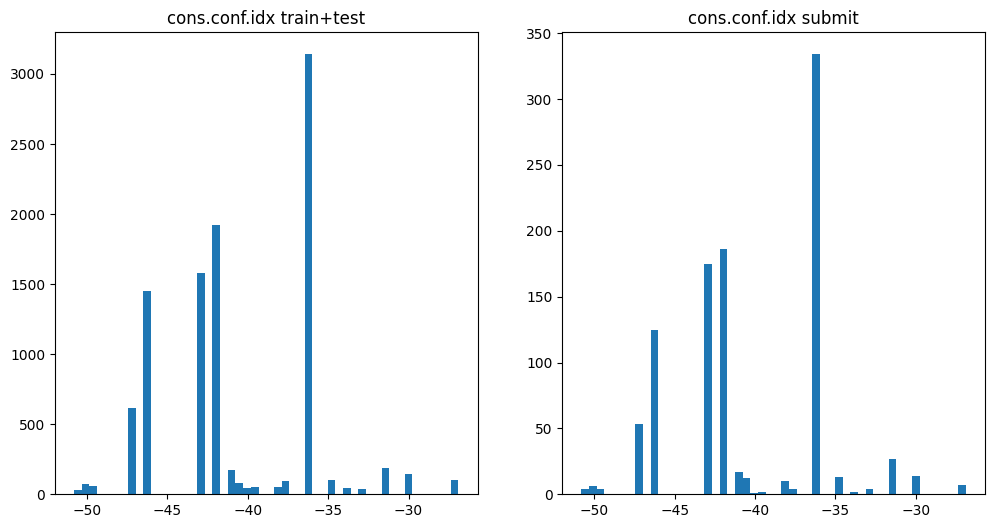

In [39]:
plot_hist(data, submit, "cons.conf.idx")

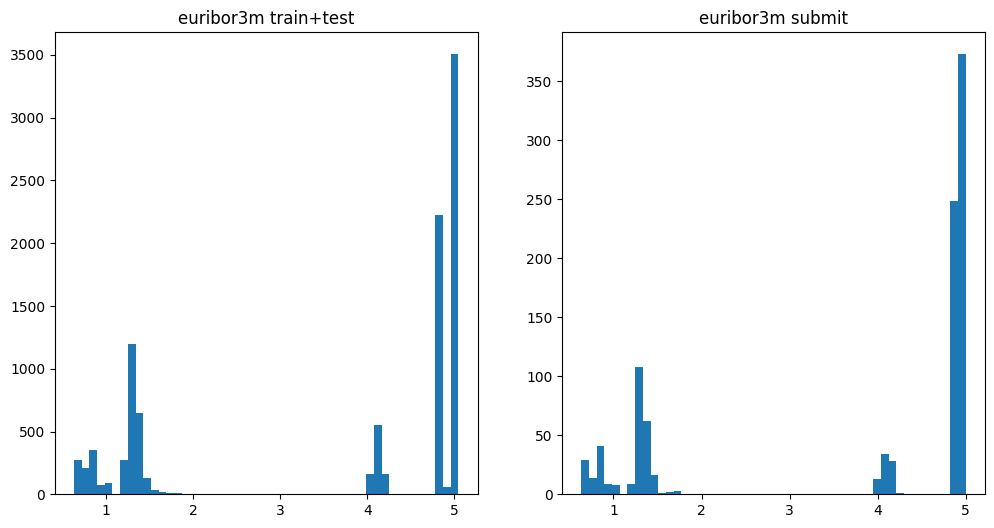

In [40]:
plot_hist(data, submit, "euribor3m")

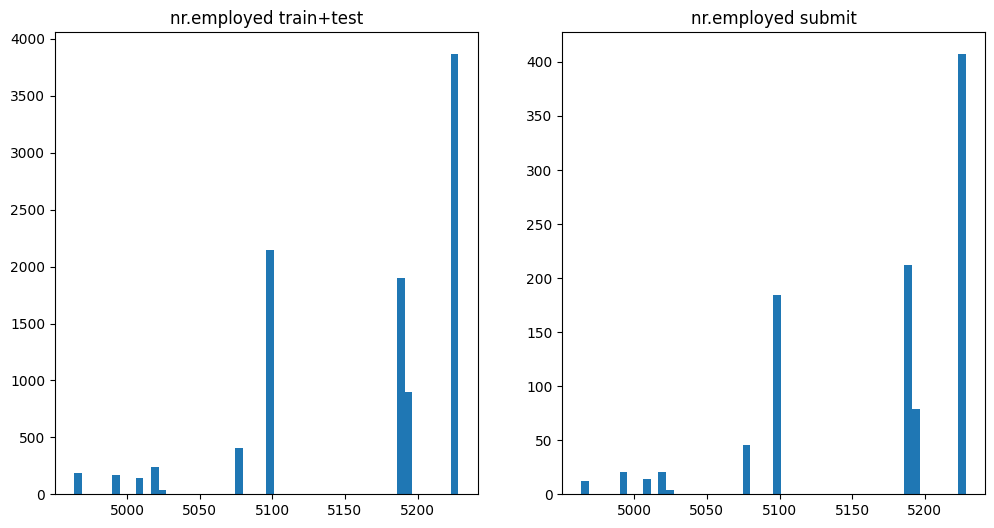

In [41]:
plot_hist(data, submit, "nr.employed")

# カテゴリ変数

In [43]:
# カテゴリ変数でtrain_testとsubmitで差異があるか確認
# 特にsubmitに入っていてtrain_testに入っていないものがあるか確認
def check_diff(data, submit, col, reversed=False):
    if reversed:
        return set(data[col].unique().to_list()) - set(submit[col].unique().to_list())
    else:
        return set(submit[col].unique().to_list()) - set(data[col].unique().to_list())

cat_cols = [col for col in data.columns if data[col].dtype == pl.String]
cat_cols.remove("y")
for col in cat_cols:
    print(col, check_diff(data, submit, col))
print()
print("reversed")
for col in cat_cols:
    print(col, check_diff(data, submit, col, reversed=True))

job set()
marital set()
education set()
default set()
housing set()
loan set()
contact set()
month set()
day_of_week set()
poutcome set()

reversed
job set()
marital set()
education set()
default {'yes'}
housing set()
loan set()
contact set()
month set()
day_of_week set()
poutcome set()


In [ ]:
# train_testにはyesのサンプルが1つ含まれている
data["default"].value_counts()

default,count
str,u32
"""yes""",1
"""no""",7944
"""unknown""",2055


In [ ]:
# カテゴリ変数ごとのユニーク数を確認
# 極端にユニーク数が多い列はない
for col in cat_cols:
    print(col, data[col].n_unique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
